In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

The number of Rows are "10841", and the number of columns are "13"
The name of the columns are: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ve

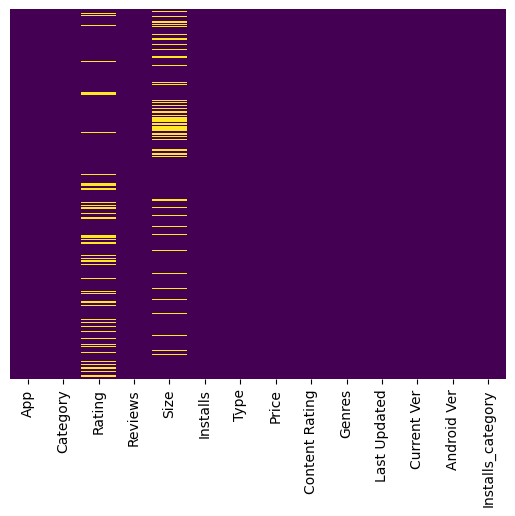

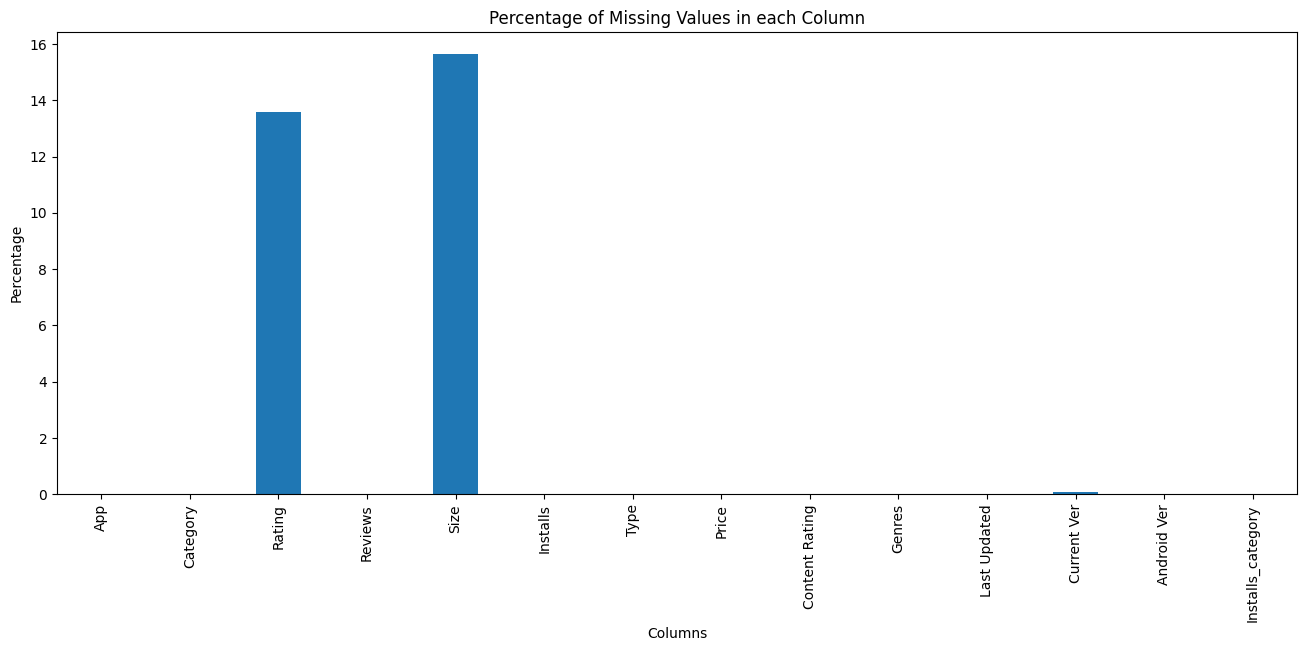

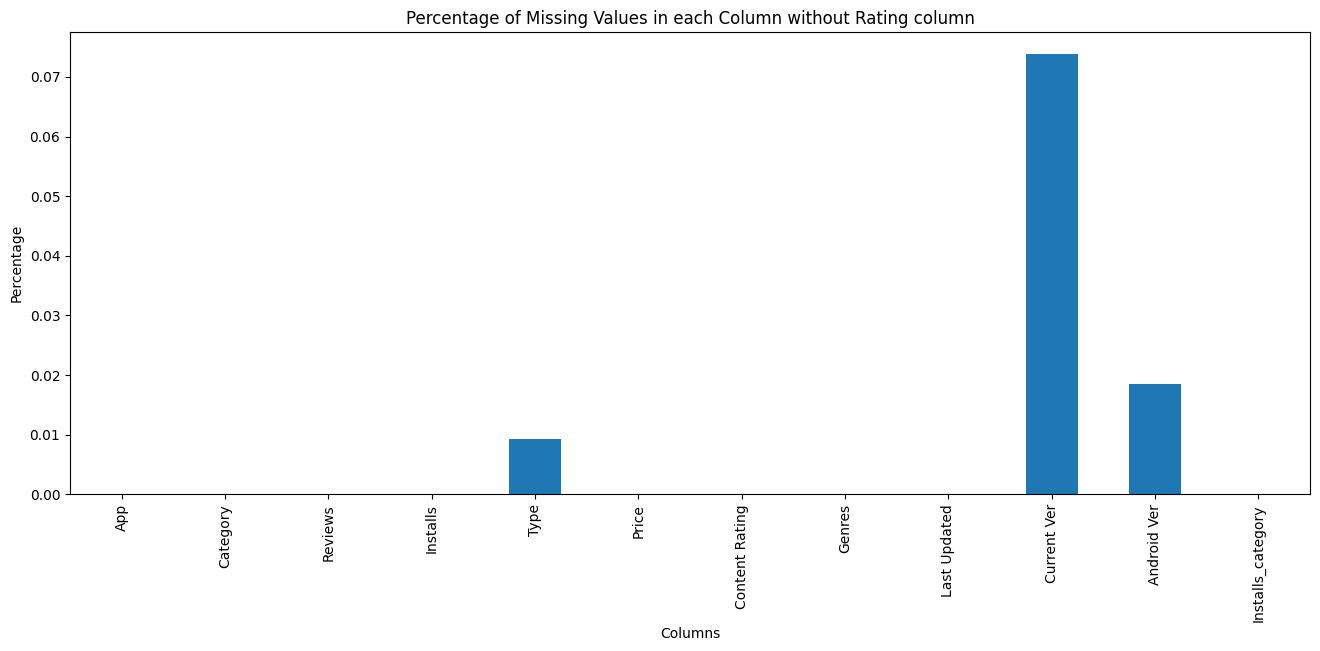

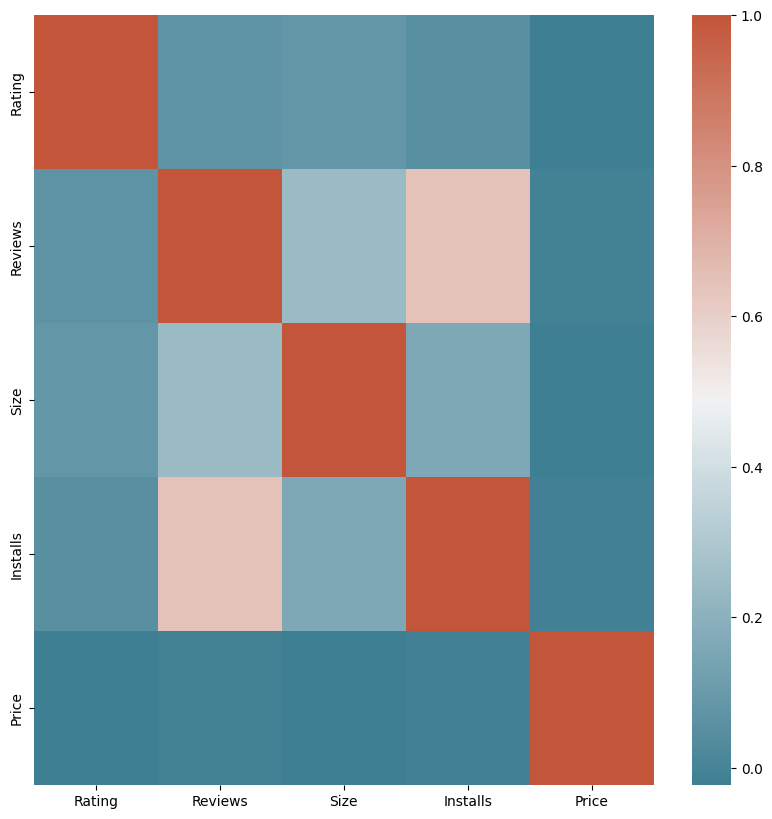

Pearson's R between Reviews and Installs: 0.6262
Length of the dataframe after removing null values: 10829
Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Installs_category column are: 10821
Number of duplicates in df are: 483


<Axes: xlabel='Rating', ylabel='Density'>

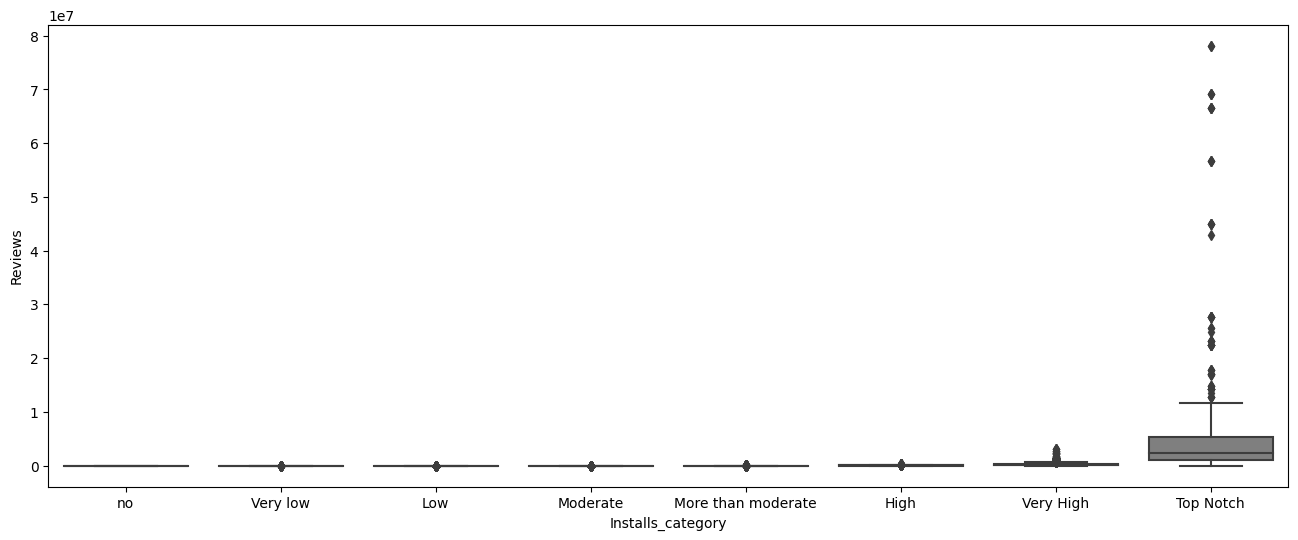

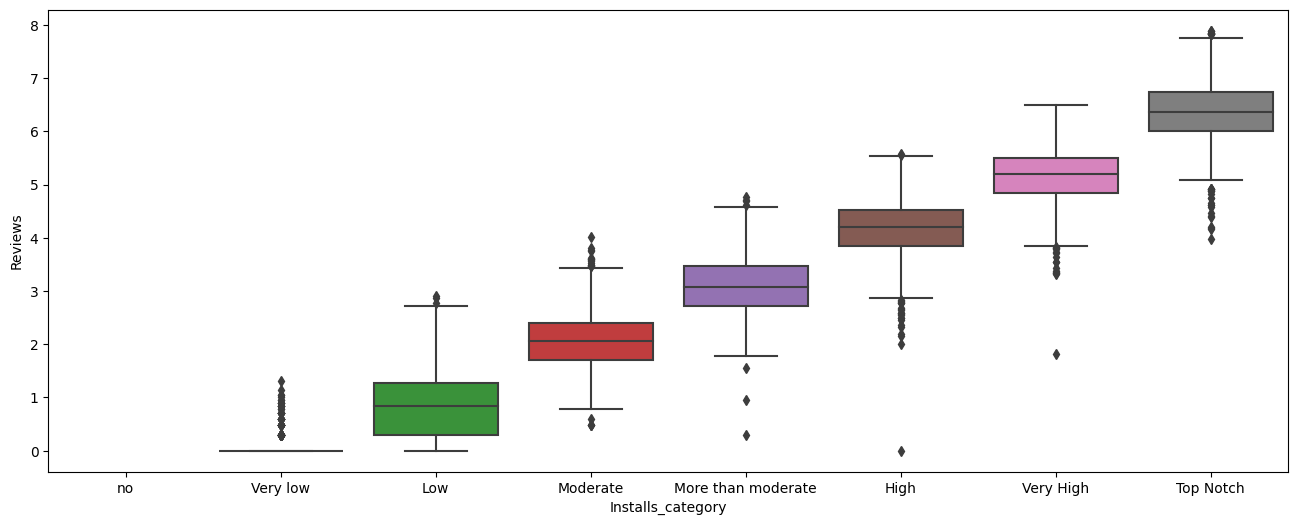

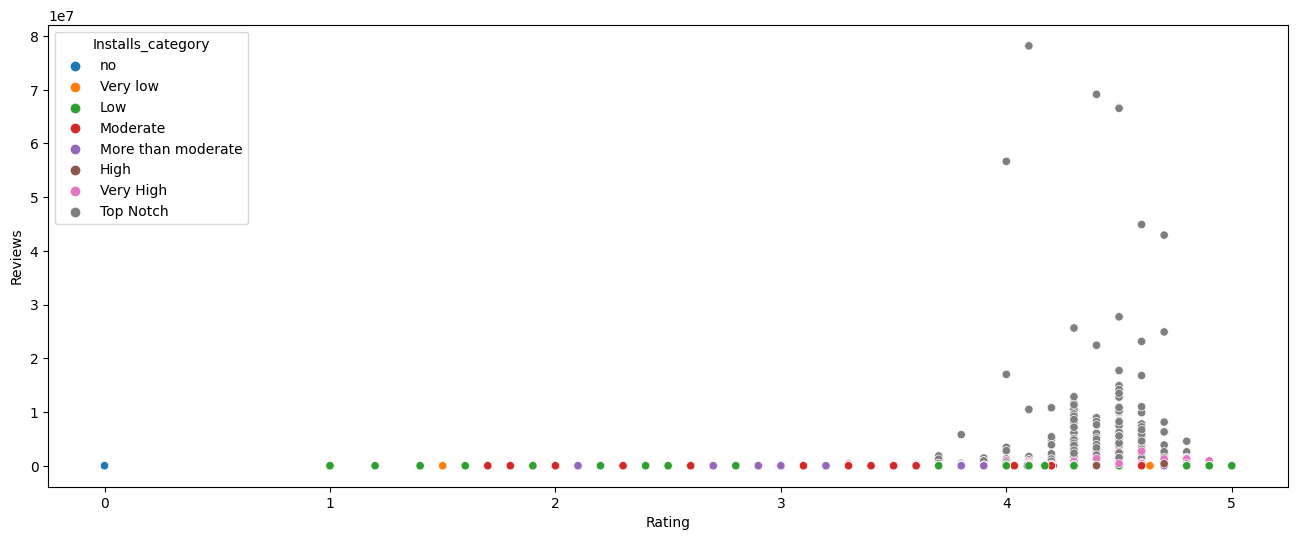

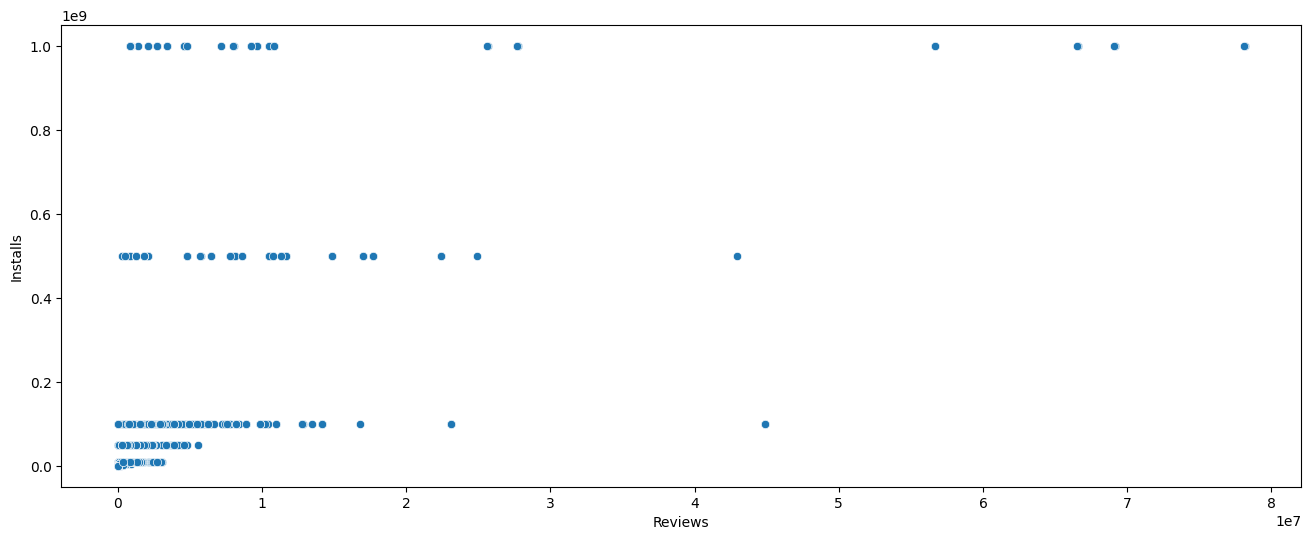

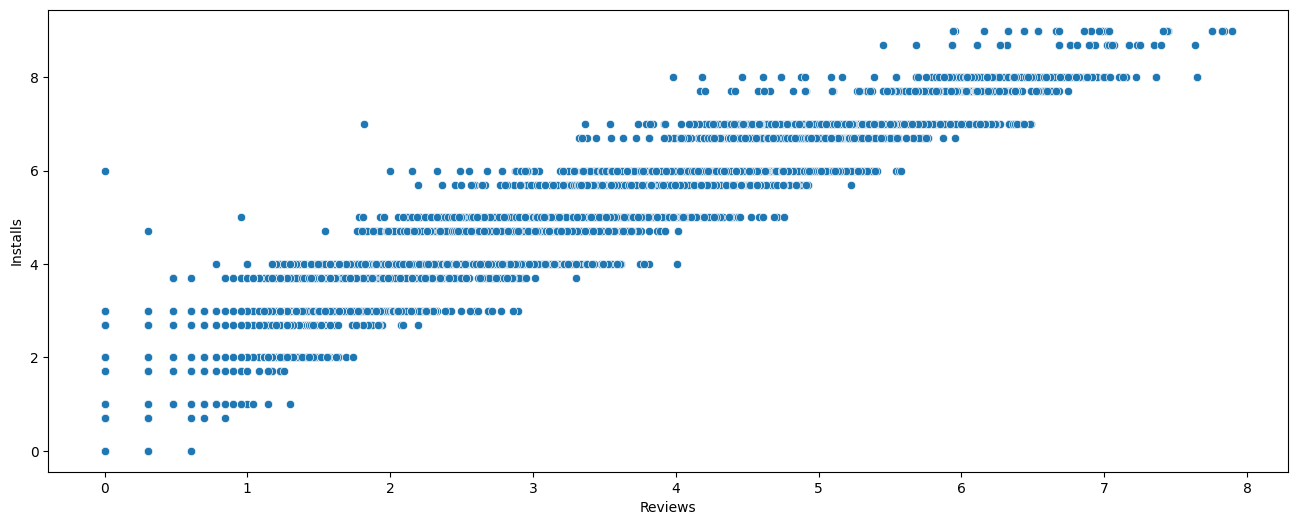

<Figure size 1600x600 with 0 Axes>

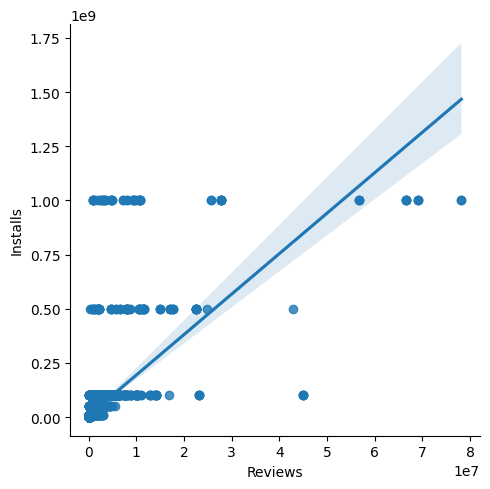

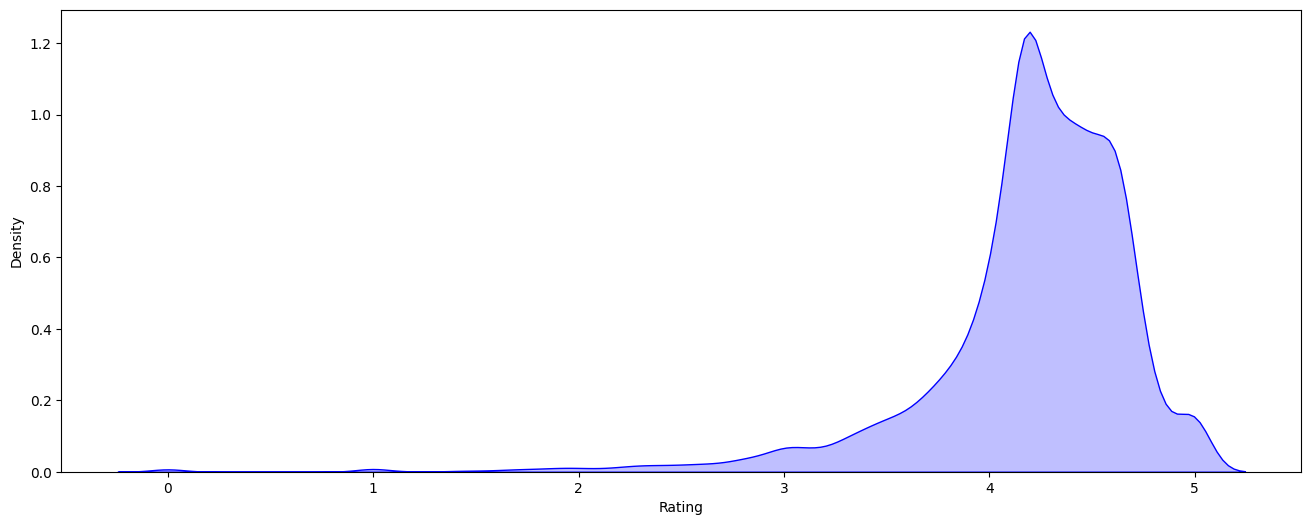

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv')
#df.head(4)

#df.iloc[10474: 10494]
#df.sample(10)
#df.tail()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(f'The number of Rows are "{df.shape[0]}", and the number of columns are "{df.shape[1]}"')
print(f'The name of the columns are: {df.columns}')
df.info()
df.describe()

df.drop(10472, axis=0, inplace=True)
df.info()

df['Reviews'] = df['Reviews'].astype('int')
df.describe()

df['Size'].value_counts()
df['Size'].isnull().sum()

print("Number of M in Size Column", df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum())
print("Number of k in Size Column", df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum())
print("Number of Varies with device in Size Column", df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum())

def convert_into_bytes(column_name):
    if isinstance(column_name, str):
        if 'k' in column_name:
            return float(column_name.replace("k", "")) * 1024
        elif 'M' in column_name:
            return float(column_name.replace("M", "")) * 1024 * 1024
        elif 'Varies with device' in column_name:
            return np.nan
    return column_name

df['Size'] = df['Size'].apply(convert_into_bytes)
df['Size']

def installs(install):
    if isinstance(install, str):
        if '+' in install:
            return install.replace("+", "")
    return int(install)

## Define a function to deal with installs column
df['Installs'] = df['Installs'].apply(installs)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].astype('int')
df['Installs'].value_counts()

# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)
df['Installs_category'].value_counts()
        
df.head(4)
df['Price'].unique()
        
def adjust_price(price):
    if isinstance(price, str):
        if '$' in price:
            return price.replace("$", "")
    return price 
        
df['Price'] = df['Price'].apply(adjust_price)
df['Price'].unique()
        
df['Price'].dtype
df['Price'] = df['Price'].astype('float')
df.describe()
        
df.head()
df.isnull().sum().sort_values(ascending=False)
        
### Plot Missing Values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
        
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
       
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') 
# plot the null valuesby their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column') 

df.columns

numeric_cols = [i for i in df.columns if df[i].dtype != 'object' ] 
# make a list of numeric columns

numeric_cols.remove("Installs_category")
numeric_cols

corr = df[numeric_cols].corr()
corr

plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

# we can calculate the pearson correlation coefficient using scipy as well as follows
# this is to install scipy if you have not done it before
# pip install scipy
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category','Type' and 'Genres' column 
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

df['Rating'].isnull().sum()

# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

def fill_missing_ratings(df, category, fill_value):
    """Fills missing rating values in a specified category with a given value.
    Args:
        df: The pandas DataFrame containing the data.
        category: The category to fill missing values for.
        fill_value: The value to fill missing ratings with.
    Returns:
        The modified DataFrame with filled missing values.
    """
    
    # Filter the DataFrame for rows where the category matches and rating is missing
    filtered_df = df[(df['Installs_category'] == category) & df['Rating'].isnull()]

    # Fill the missing values with the specified value
    df.loc[filtered_df.index, 'Rating'] = fill_value
    return df

df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Very low', 4.637037)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)
df = fill_missing_ratings(df, 'no', 0)

# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

df['Rating'].isnull().sum()
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) #plot the scatter plot

# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

# find duplicate if any
df.duplicated().sum()

# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

# remove the duplicates
df.drop_duplicates(inplace=True)

# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(df['Rating'], color="blue", shade=True) # plot the distribution plot